<a href="https://colab.research.google.com/github/hellokayas/Some-Programming-Samples/blob/master/facebook_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

#df = pd.read_excel("FB_stock.xlsx", sheet_name=None)
read_file = pd.read_excel(r'FB_stock.xlsx')
read_file.to_csv(r'FB_stock.csv', index = None, header=True)
ourdata = pd.read_csv("FB_stock.csv")
ourdata

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-11-19,20.08,20.65,20.00,20.23,20.23,65226
1,2021-11-18,19.94,20.00,19.73,19.87,19.87,23110
2,2021-11-17,20.19,20.19,19.95,19.95,19.95,16423
3,2021-11-16,20.19,20.26,20.00,20.15,20.15,22383
4,2021-11-15,20.22,20.69,20.15,20.42,20.42,43003
5,2021-11-12,19.38,20.02,19.38,19.98,19.98,65731
6,2021-11-11,19.36,19.42,19.18,19.19,19.19,16124
7,2021-11-10,19.50,19.50,19.10,19.21,19.21,26942
8,2021-11-09,19.94,20.01,19.64,19.66,19.66,43238
9,2021-11-08,20.23,20.23,19.87,19.88,19.88,45441


In [1]:
from google.colab import files 
uploaded = files.upload()

Saving FB_stock.xlsx to FB_stock.xlsx


In [4]:
# use the FB prophet model for prediction which uses the autoregressive model, additive model
# Select only the important features i.e. the date and price
data = ourdata[["Date","Close*"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close*":"y"}) #renaming the columns of the dataset
data.head(5)
# Here, ds is the date and y is the Google Stock price.

,ds,y
0,2021-11-19,20.23
1,2021-11-18,19.87
2,2021-11-17,19.95
3,2021-11-16,20.15
4,2021-11-15,20.42


In [5]:
# pip install fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


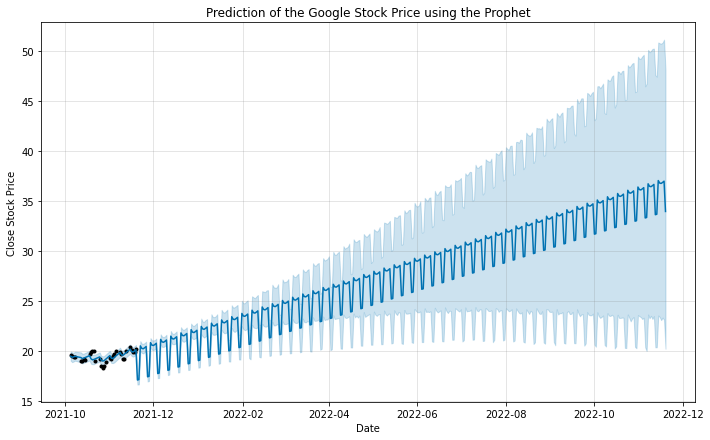

In [6]:
from fbprophet import Prophet
# plot the predictions
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

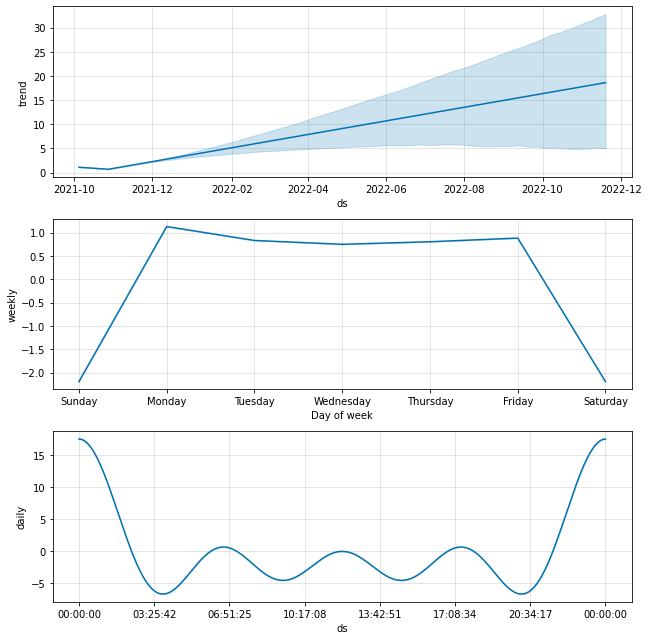

In [7]:
# Plot the trend, weekly and daily components
m.plot_components(prediction)
plt.show()